[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slayoo/seattle-2026-workshop/blob/main/part_1_scipy_sampling_partial.ipynb)

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils

# hacking aerosol-cloud μ-physics modeling concepts in Python
### (mini-workshop @Uni. Washington Seattle, Jan 2026)

### Part 1: size spectrum sampling using SciPy 

notebook authors (alphabetically): 
- Sylwester Arabas
- Emma Ware

This notebook depicts ways to sample a probaility distribution using [SciPy's stats](https://docs.scipy.org/doc/scipy/reference/stats.html) utilities. 

In [2]:
import numpy as np, scipy
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot

rng = np.random.default_rng(seed=1)

σ_geom = 1.4
median_size = 1
norm = 10000 # Total Number of bins, normalization factor
n_sd = 32

spectrum = scipy.stats.lognorm(
    np.log(σ_geom),
    0,
    median_size,
)

### • constant multiplicity sampling (deterministic & pseudorandom)

In [3]:
cdf_values = {
    'deterministic': np.linspace(0.01, 0.99, n_sd),
    'pseudorandom': rng.uniform(0, 1, n_sd)
}
multiplicity = np.full(n_sd, norm / n_sd)

size, mult = {}, {}
for method in cdf_values:
    mult[method] = multiplicity
    size[method] = spectrum.ppf(cdf_values[method])

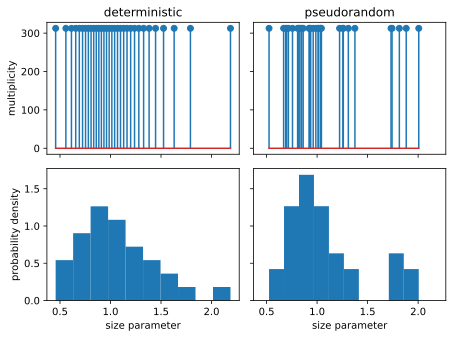

In [4]:
def plot(size, mult):
    _, axs = pyplot.subplots(2, 2, sharex=True, sharey='row', tight_layout=True)
    for column, method in enumerate(size.keys()):
        axs[0, column].stem(size[method], mult[method])
        axs[0, column].set(title=method)
        axs[1, column].hist(size[method], weights=mult[method], label="constant-multiplicity sampling", density=True)
        axs[1, column].set(xlabel="size parameter")
    axs[0, 0].set(ylabel="multiplicity")
    axs[1, 0].set(ylabel="probability density")
    show_plot()
plot(size, mult)

### • uniform sampling (deterministic & pseudorandom)

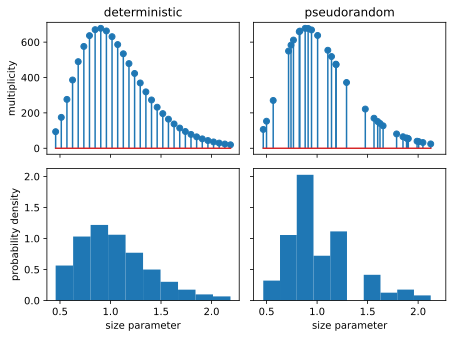

In [6]:
size_range = spectrum.ppf([.01, .99])
size = {
    'deterministic': np.linspace(*size_range, n_sd),
    'pseudorandom': rng.uniform(*size_range, n_sd)
}
mult = {
    method: spectrum.pdf(size[method]) * norm * (size_range[1] - size_range[0])/n_sd
    for method in size.keys()
}
plot(size, mult)

In [8]:
rng.permutation(10)

array([6, 8, 1, 4, 7, 3, 5, 9, 0, 2])